## Import the required libraries and load the data:


### Load the required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage


### Check the first few samples, shape, and info of the data.

In [2]:
df = pd.read_csv('renttherunway.csv.crdownload')

In [3]:
# Assuming 'df' is your DataFrame variable holding the dataset
print(df.head())


   Unnamed: 0  fit  user_id bust size    item_id  weight  rating  \
0           0  fit   420272       34d  2260466.0  137lbs    10.0   
1           1  fit   273551       34b   153475.0  132lbs    10.0   
2           2  fit   360448       NaN  1063761.0     NaN    10.0   
3           3  fit   909926       34c   126335.0  135lbs     8.0   
4           4  fit   151944       34b   616682.0  145lbs    10.0   

      rented for                                        review_text  \
0       vacation  An adorable romper! Belt and zipper were a lit...   
1          other  I rented this dress for a photo shoot. The the...   
2          party  This hugged in all the right places! It was a ...   
3  formal affair  I rented this for my company's black tie award...   
4        wedding  I have always been petite in my upper body and...   

           body type                                     review_summary  \
0          hourglass                               So many compliments!   
1  straight & 

In [4]:
print(df.shape)


(25164, 16)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164 entries, 0 to 25163
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25164 non-null  int64  
 1   fit             25164 non-null  object 
 2   user_id         25164 non-null  int64  
 3   bust size       22727 non-null  object 
 4   item_id         25163 non-null  float64
 5   weight          21155 non-null  object 
 6   rating          25153 non-null  float64
 7   rented for      25161 non-null  object 
 8   review_text     25156 non-null  object 
 9   body type       23293 non-null  object 
 10  review_summary  25119 non-null  object 
 11  category        25163 non-null  object 
 12  height          25068 non-null  object 
 13  size            25163 non-null  float64
 14  age             25026 non-null  float64
 15  review_date     25163 non-null  object 
dtypes: float64(4), int64(2), object(10)
memory usage: 3.1+ MB
None


## Data cleansing and Exploratory data analysis:


### Check if there are any duplicate records in the dataset? If any, drop them. 

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.shape

(25164, 16)

### Drop the columns which you think redundant for the analysis

In [8]:
columns_to_drop = ['Unnamed: 0', 'fit','item_id','rating','size']
df = df.drop(columns=columns_to_drop)


## Check the 'weight' column for string data and convert to float (assuming 'lbs' suffix)

In [9]:
df['weight'] = df['weight'].str.replace('lbs', '').astype(float)


## Check unique categories for the 'rented for' column and group 'party: cocktail' with 'party'.

In [10]:
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')


## 7 Convert the 'height' column from feet to inches with float datatype

In [11]:
# Check the Data Types: Verify the data type of the column or variable being used
print(df['height'].dtype)



object


In [12]:
# Convert Floats to Strings: If the column contains floats, convert them to strings before applying string operations.

df['height'] = df['height'].astype(str)


In [13]:
# Handle NaN Values: Ensure that the column does not contain NaN values, as these can cause issues with string operations.

df['height'] = df['height'].fillna('')


In [14]:
#Identify the Problematic Values: Check the specific column for non-numeric values.

df['height'].apply(lambda x: print(x) if isinstance(x, str) else x)


5' 8"
5' 6"
5' 4"
5' 5"
5' 9"
5' 8"
5' 3"
5' 3"
5' 6"
5' 3"
5' 3"
5' 6"
5' 6"
5' 2"
5' 5"
5' 7"
5' 8"
5' 5"
5' 3"
5' 6"
5' 5"
5' 6"
5' 5"
5' 6"
5' 8"
5' 6"
5' 6"
5' 3"
5' 9"
5' 1"
5' 3"
5' 5"
5' 3"
5' 3"
5' 10"
5' 8"
5' 3"
5' 6"
5' 5"
5' 6"
5' 1"
5' 8"
5' 4"
5' 4"
5' 2"
5' 5"
5' 8"
5' 8"
5' 6"
5' 4"
5' 7"
5' 7"
5' 7"
5' 2"
5' 1"
5' 7"
5' 4"
5' 9"
5' 7"
5' 8"
5' 2"
5' 6"
5' 4"
5' 4"
5' 5"
5' 6"
5' 2"
5' 7"
5' 5"
5' 3"
5' 3"
5' 6"
5' 8"
5' 8"
5' 5"
5' 4"
5' 5"
5' 6"
5' 9"
5' 5"
5' 2"
5' 6"
5' 9"
5' 5"
5' 4"
5' 6"
5' 3"
5' 3"
5' 4"
5' 4"
5' 4"
5' 8"
5' 2"
5' 5"
5' 6"
5' 6"
5' 9"
5' 2"
5' 5"
5' 6"
5' 4"
5' 2"
5' 2"
5' 7"
5' 9"
5' 1"
5' 4"
5' 5"
5' 2"
5' 2"
5' 6"
5' 4"
5' 8"
5' 6"
5' 5"
5' 2"
5' 1"
5' 7"
5' 4"
5' 10"
5' 8"
5' 1"
5' 3"
5' 6"
5' 6"
6' 0"
5' 4"
5' 8"
5' 6"
4' 10"
5' 4"
5' 7"
5' 9"
5' 8"
5' 6"
5' 2"
5' 8"
5' 7"
5' 7"
5' 7"
5' 9"
5' 7"
5' 6"
5' 1"
5' 3"
5' 6"
5' 6"
5' 8"
5' 10"
5' 4"
5' 7"
6' 1"
5' 6"
5' 4"
5' 7"
5' 3"
5' 8"
5' 9"
5' 8"
5' 7"
5' 7"
5' 9"
5' 8"
5' 11"
5' 6"
5' 7"

0        None
1        None
2        None
3        None
4        None
         ... 
25159    None
25160    None
25161    None
25162    None
25163    None
Name: height, Length: 25164, dtype: object

In [15]:
# Clean and Convert the Values: Convert the height values from the format "5' 8" to inches.

def convert_height(height_str):
    match = re.match(r"(\d+)' (\d+)", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        total_inches = feet * 12 + inches
        return total_inches
    else:
        return None  

df['height'] = df['height'].apply(convert_height).astype(float)


In [16]:

df['height'] = df['height'].fillna(df['height'].mean()) 

print(df)

       user_id bust size  weight     rented for  \
0       420272       34d   137.0       vacation   
1       273551       34b   132.0          other   
2       360448       NaN     NaN          party   
3       909926       34c   135.0  formal affair   
4       151944       34b   145.0        wedding   
...        ...       ...     ...            ...   
25159   763103       34b   117.0        wedding   
25160   618783       32c   105.0          party   
25161   101599       NaN     NaN  formal affair   
25162   246685       36d   170.0        wedding   
25163     6392       NaN     NaN            NaN   

                                             review_text          body type  \
0      An adorable romper! Belt and zipper were a lit...          hourglass   
1      I rented this dress for a photo shoot. The the...  straight & narrow   
2      This hugged in all the right places! It was a ...                NaN   
3      I rented this for my company's black tie award...               

#### 8.Check for missing values and impute them with appropriate methods.

In [17]:
print(df.isnull().sum())
df['height'].fillna(df['height'].mean(), inplace=True)


user_id              0
bust size         2437
weight            4009
rented for           3
review_text          8
body type         1871
review_summary      45
category             1
height               0
age                138
review_date          1
dtype: int64


#### 9.Check statistical summary for numerical and categorical columns

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,25164.0,500699.048204,288711.471375,44.0,251665.25,502254.0,752663.75,999952.0
weight,21155.0,137.397636,22.000846,50.0,123.00,135.0,150.00,300.0
height,25164.0,65.269866,2.652759,54.0,63.00,65.0,67.00,76.0
age,25026.0,33.842284,8.018850,0.0,29.00,32.0,37.00,117.0


In [19]:
df.describe(include='O')

,bust size,rented for,review_text,body type,review_summary,category,review_date
count,22727,25161,25156,23293,25119,25163,25163
unique,87,8,25084,7,22160,58,2020
top,34b,wedding,.,hourglass,Stylist Review,dress,"June 15, 2016"
freq,3620,7612,9,7250,132,12118,88


#### 10. Identify and treat outliers in the 'age' column.

In [20]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]
print(df)

       user_id bust size  weight     rented for  \
0       420272       34d   137.0       vacation   
1       273551       34b   132.0          other   
3       909926       34c   135.0  formal affair   
4       151944       34b   145.0        wedding   
5       734848       32b   138.0           date   
...        ...       ...     ...            ...   
25158   748861       34a   108.0        wedding   
25159   763103       34b   117.0        wedding   
25160   618783       32c   105.0          party   
25161   101599       NaN     NaN  formal affair   
25162   246685       36d   170.0        wedding   

                                             review_text          body type  \
0      An adorable romper! Belt and zipper were a lit...          hourglass   
1      I rented this dress for a photo shoot. The the...  straight & narrow   
3      I rented this for my company's black tie award...               pear   
4      I have always been petite in my upper body and...           athl

#### 11.Visualize distribution of categories in 'rented for' column.


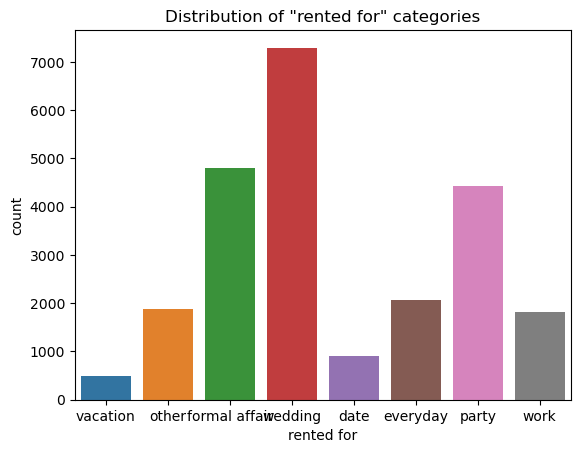

In [21]:
sns.countplot(x='rented for', data=df)
plt.title('Distribution of "rented for" categories')
plt.show()


#### 12.Encode categorical variables.



In [22]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df)

       user_id  bust size  weight  rented for  review_text  body type  \
0       420272         37   137.0           5          534          3   
1       273551         35   132.0           3         7509          6   
3       909926         36   135.0           2         7906          4   
4       151944         35   145.0           6         5289          1   
5       734848         22   138.0           0         1364          1   
...        ...        ...     ...         ...          ...        ...   
25158   748861         33   108.0           6         3804          1   
25159   763103         35   117.0           6        13035          3   
25160   618783         23   105.0           4        12842          5   
25161   101599         87     NaN           2        17193          7   
25162   246685         50   170.0           6         5176          3   

       review_summary  category  height   age  review_date  
0               15053        38    68.0  28.0           70  
1

#### 13.Standardize the data.



In [23]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the standardized data
print(df_standardized)


        user_id  bust size    weight  rented for  review_text  body type  \
0     -0.281126  -0.264246 -0.010294    0.502076    -1.650777  -0.137847   
1     -0.789529  -0.373970 -0.238126   -0.470568    -0.628919   1.450632   
2      1.415575  -0.319108 -0.101427   -0.956891    -0.570758   0.391646   
3     -1.210910  -0.373970  0.354238    0.988399    -0.954156  -1.196833   
4      0.808912  -1.087174  0.035273   -1.929536    -1.529179  -1.196833   
...         ...        ...       ...         ...          ...        ...   
23672  0.857468  -0.483694 -1.331722    0.988399    -1.171712  -1.196833   
23673  0.906818  -0.373970 -0.921623    0.988399     0.180656  -0.137847   
23674  0.406735  -1.032312 -1.468421    0.015754     0.152381   0.921139   
23675 -1.385361   2.478846       NaN   -0.956891     0.789815   1.980125   
23676 -0.882623   0.448958  1.493400    0.988399    -0.970710  -0.137847   

       review_summary  category    height       age  review_date  
0            0.78131

#### 14.Apply PCA and determine number of components for variance.



In [24]:
# Check for NaN values
print(df.isnull().sum())  # This will show NaN counts in each column

user_id              0
bust size            0
weight            3762
rented for           0
review_text          0
body type            0
review_summary       0
category             0
height               0
age                  0
review_date          0
dtype: int64


In [25]:
df_standardized.drop('weight', axis=1, inplace=True)

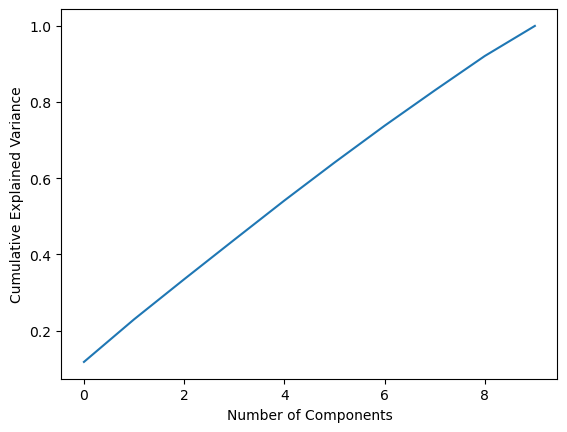

In [26]:
# Assuming X is your standardized data
pca = PCA()
pca.fit(df_standardized)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


#### 15 Apply K-means clustering.

#### a. Find optimal K using elbow method.


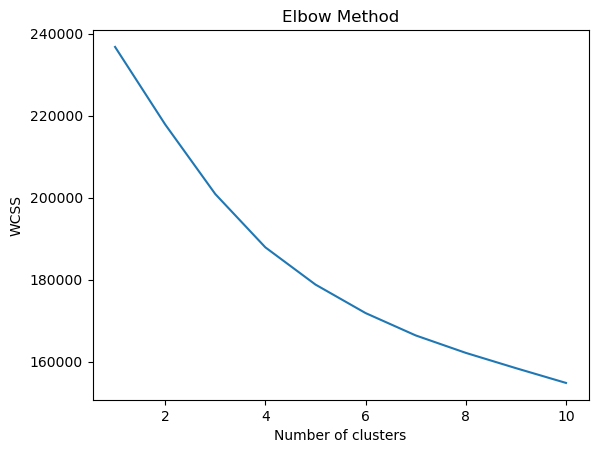

In [27]:
X=df_standardized
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


###### we can say that The optimal K is 5 at the point where the WCSS starts to decrease slowly

#### b. Build K-means model.

In [28]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


#### c. Compute silhouette score.

In [29]:

silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.091048431053099


###### Scores around 0 indicate overlapping clusters

#### 16.Apply Agglomerative clustering.


#### a. Find optimal K using dendrogram.


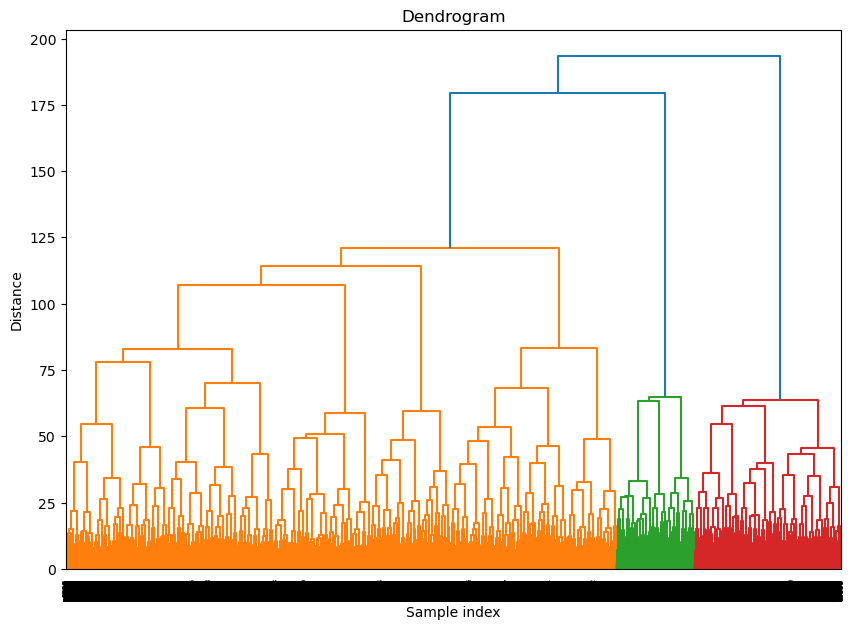

In [30]:

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


#### b. Build Agglomerative clustering model.


In [31]:
optimal_k = 10  
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
y_agg = agglomerative.fit_predict(X)


#### c. Compute silhouette score.

In [32]:

silhouette_avg = silhouette_score(X, y_agg)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.021241284893233077


## Conclusion

#### 17.Perform cluster analysis and write conclusions.


In [44]:
data = X
# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['height', 'age']])



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


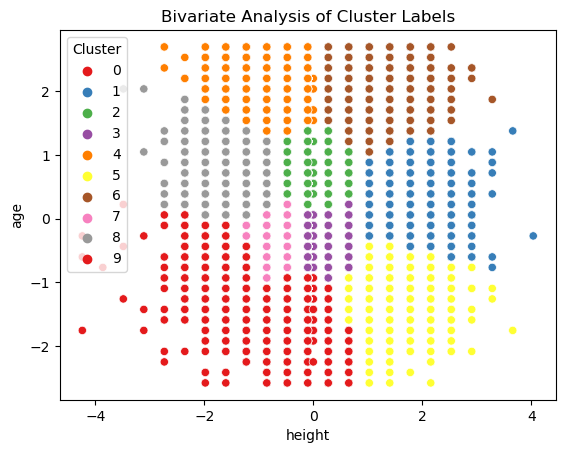

In [45]:
# Bivariate analysis
sns.scatterplot(data=data, x='height', y='age', hue='Cluster', palette='Set1')
plt.title('Bivariate Analysis of Cluster Labels')
plt.show()

In [40]:
# Conclusion
cluster_means = data.groupby('Cluster')[['height', 'age']].mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
           height       age
Cluster                    
0       -0.049880  1.406610
1        0.928954 -0.395178
2       -0.800332 -0.448002
